In [33]:
import pandas as pd
import pandas as pd
from scipy.stats import ttest_ind
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mannwhitneyu, kruskal
import numpy as np

def reverse_url(url):
    components = str(url).split('.')
    reversed_url = '.'.join(components[::-1])
    return reversed_url

# Custom aggregation function to select the string with the minimum length, prioritizing ".com"
def min_length_string(series):
    # Calculate lengths of strings
    lengths = series.apply(len)
    
    # Find the index of the string with the minimum length
    min_length_index = lengths.idxmin()
    
    # Check if there are multiple strings with the minimum length
    min_lengths = lengths[lengths == lengths.min()]
    
    # If there are multiple strings with the minimum length
    if len(min_lengths) > 1:
        # Check if ".com" is in any of the strings
        com_indices = series[series.str.startswith('com.')].index
        
        # If there is at least one string containing ".com"
        if len(com_indices) > 0:
            # Find the shortest length among indices containing ".com"
            shortest_com_index = min(com_indices, key=lambda x: lengths[x])
            return series[shortest_com_index]
    
    return series[min_length_index]


df_casino = pd.read_csv('bad_casino_urls.csv', names=['url','name'])
df_casino = df_casino.groupby('name')['url'].agg(min_domain=min_length_string)
df_casino.reset_index()['min_domain'].to_csv('bad_casino_urls_filtered.csv', index=False)
df_casino.reset_index()['min_domain'].apply(reverse_url).to_csv('bad_casino_urls_filtered_reversed.csv', index=False)


<Axes: >

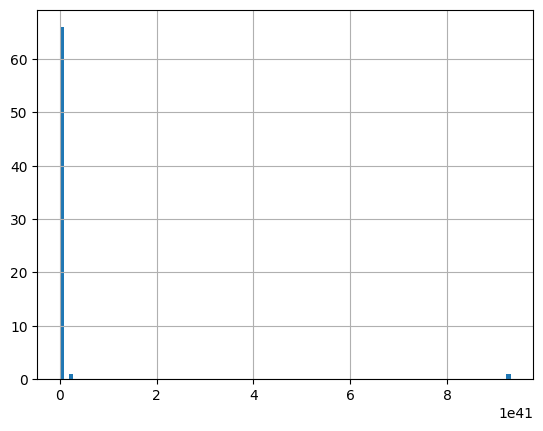

In [24]:

exp_name = "Scam Casinos"
post_file = "post_ranks.casino_only.txt"
metric = "pagerank_centrality"
pre_file='pre_ranks.casino_only.txt'
cc_rank_cols_pre = ["harmonic_rank", "orig_hr", "pagerank_rank", "orig_pr", "url", "a"]
cc_rank_cols_post = ["harmonic_rank", "inter_hr", "pagerank_rank", "inter_pr", "url", "a"]

# Read pre and post rankings data
pre_rankings = pd.read_csv(pre_file, sep='\t', names=cc_rank_cols_pre)
post_rankings = pd.read_csv(post_file, sep='\t', names=cc_rank_cols_post)
pre_rankings['url'] = pre_rankings['url'].apply(reverse_url)
post_rankings['url'] = post_rankings['url'].apply(reverse_url)
df_pre_post = pd.merge(left=pre_rankings[['url', 'orig_hr']], right=post_rankings[['url', 'inter_hr']], on='url', how='inner')
df_pre_post['diff'] = (df_pre_post['orig_hr'] - df_pre_post['inter_hr']) / df_pre_post['orig_hr']
df_pre_post.head(30)

df_pre_post['diff'].hist(bins=100)

In [26]:
df_pre_post[df_pre_post['diff'] > 2]

,url,orig_hr,inter_hr,diff
1,1x2gaming.com,-6.381048e-11,8.777328e+06,1.375531e+17
12,cherryred.com,-1.811339e-33,1.103886e+00,6.094307e+32
14,classone.com,-9.514347e-20,1.019208e+07,1.071233e+26
15,classycoin.com,-7.664746e-13,7.640890e+06,9.968876e+18
20,europlaycasino.com,-6.494623e+00,7.777488e+06,1.197528e+06
38,palaceofchance.com,-9.514347e-20,9.890930e+06,1.039581e+26
39,parklanecasino.com,-1.602793e+04,7.669994e+06,4.795394e+02
47,rushmorecasino.com,-3.375457e-34,7.769818e+06,2.301856e+40
59,slotsoffortune.im,-8.230088e-36,7.669736e+06,9.319141e+41
60,wildvegascasino.im,-9.514347e-20,6.555351e+06,6.889964e+25
